<a href="https://colab.research.google.com/github/paschoal-artur/DadosAP3-main/blob/arthurt1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verifica e instala automaticamente as bibliotecas necessárias
import sys

def install_and_import(lib):
    try:
        __import__(lib)
        print(f"{lib} já está instalado.")
    except ImportError:
        print(f"{lib} não encontrado. Instalando...")
        !{sys.executable} -m pip install {lib}

bibliotecas = [
    "geopandas",
    "pandas",
    "matplotlib",
    "seaborn",
    "mapclassify",
    "numpy"
]

for lib in bibliotecas:
    install_and_import(lib)

# Agora podemos fazer as importações normalmente
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from mapclassify import NaturalBreaks
from matplotlib import colormaps
from matplotlib.ticker import MultipleLocator
import os
import subprocess
import shutil
import glob
import os

print("Todas as bibliotecas foram importadas com sucesso!")

geopandas já está instalado.
pandas já está instalado.
matplotlib já está instalado.
seaborn já está instalado.
mapclassify já está instalado.
numpy já está instalado.
Todas as bibliotecas foram importadas com sucesso!


### Configuração inicial

Crie um atalho da pasta do drive para o seu drive! conforme a imagem:

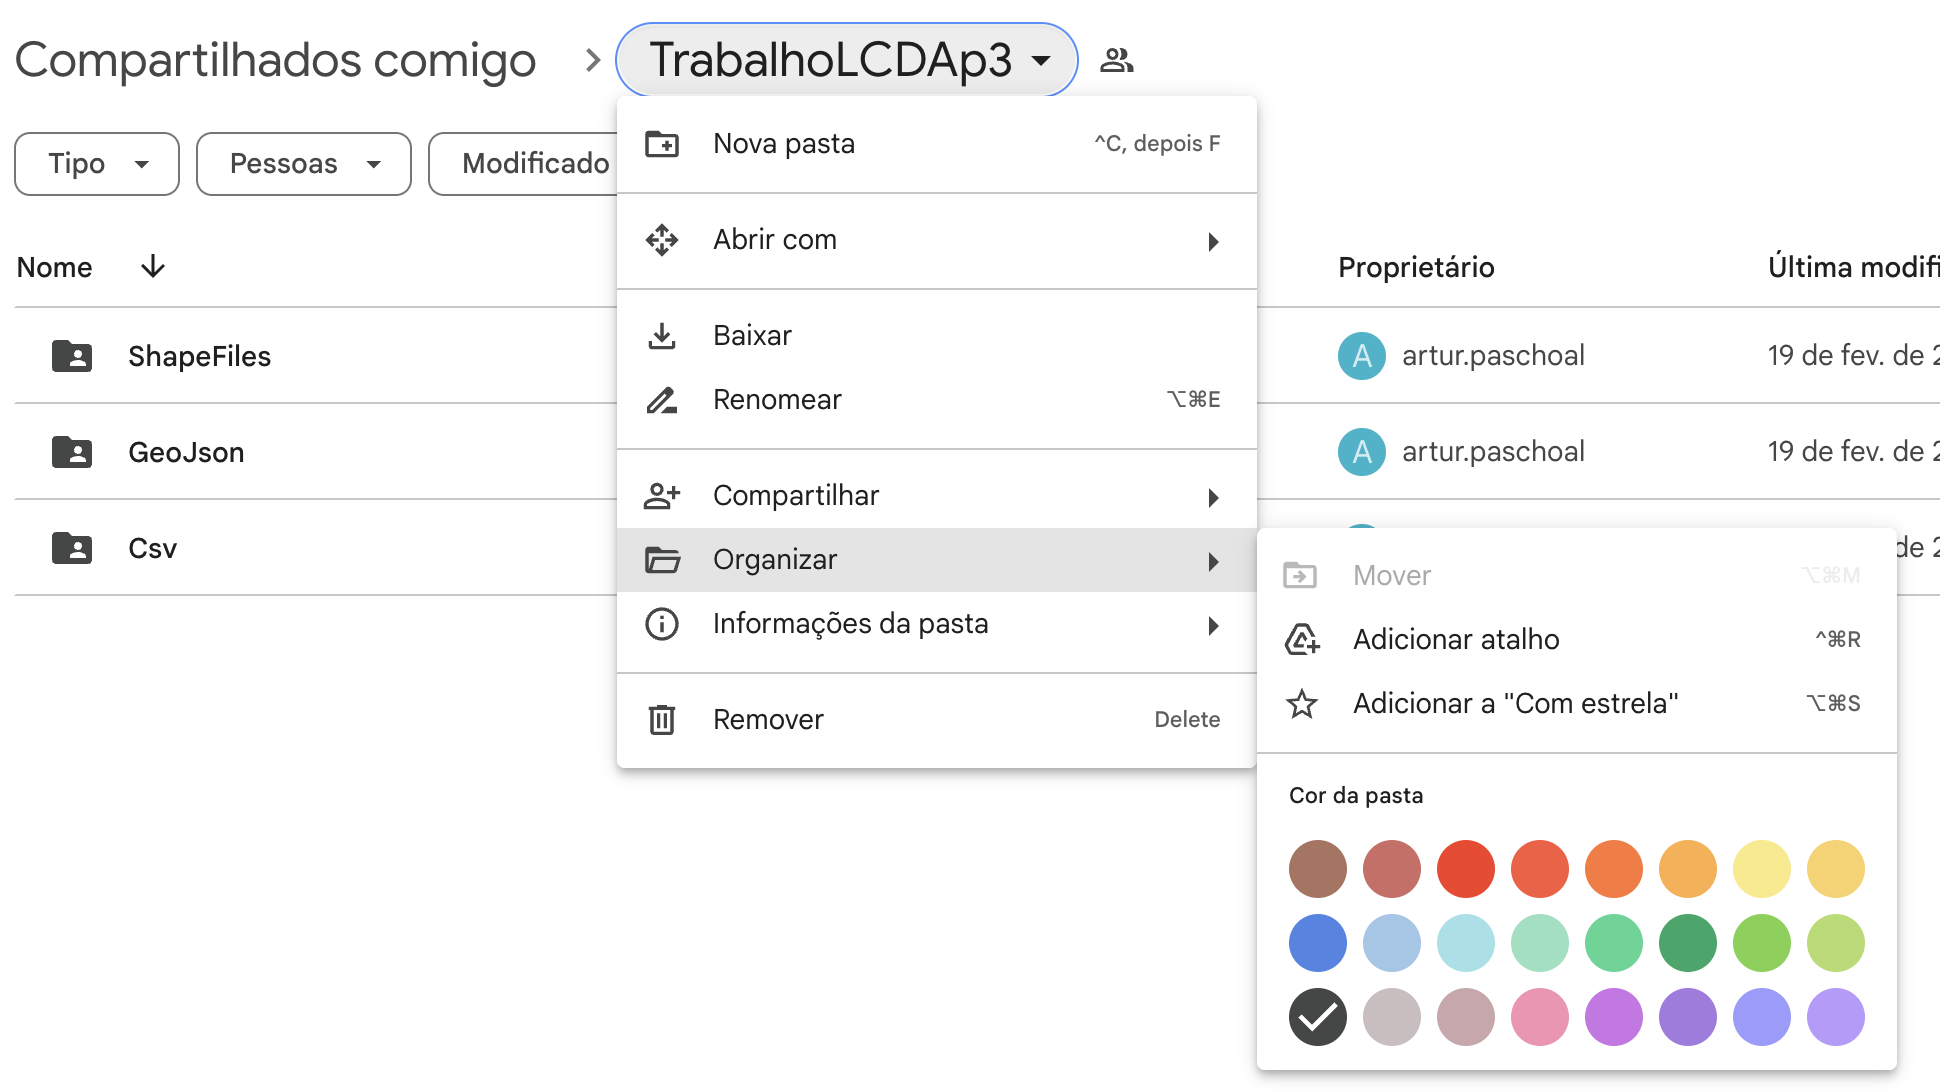


In [ ]:
# Se você estiver usando o Google Colab, primeiro monte o Google Drive:
from google.colab import drive
drive.mount('/content/drive')
import os

os.chdir('/content/drive/MyDrive/TrabalhoLCDAp3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Novo diretório de trabalho:  /content/drive/.shortcut-targets-by-id/1rbacDgFGzJ2uiPmieQJxUaBOJfcNKING/TrabalhoLCDAp3


## 1. Coleta de dados

## 1.0 Orientações para o salvamento dos arquivos

- O notebook está utilizando caminhos relativos a partir da raiz.
- Rodando localmente, o diretório onde os arquivos foram instalados foi: `raiz/data/raw`.
- Na pasta `raw`, os diretórios foram organizados da seguinte forma:
  - **CSV**
    - Datasets em CSV
  - **GeoJson**
    - Datasets em GeoJson
  - **ShapeFiles**
    - Conjunto de arquivos para cada ShapeFile


In [ ]:
class FileRenamer:
    def __init__(self, base_dir, csv_mapping, geojson_mapping):
        """
        Classe para renomear arquivos CSV e GeoJSON a partir de dicionários de mapeamento.

        :param base_dir: Caminho base (diretório raiz do projeto) onde está 'data/raw'
        :param csv_mapping: Dicionário de mapeamento para arquivos CSV
        :param geojson_mapping: Dicionário de mapeamento para arquivos GeoJSON
        """
        self.base_dir = base_dir
        self.csv_mapping = csv_mapping
        self.geojson_mapping = geojson_mapping

    def rename_files(self, folder_name, mapping):
        """
        Renomeia arquivos em uma subpasta específica usando um dicionário de mapeamento.

        :param folder_name: Nome da subpasta (ex: "Csv" ou "GeoJson")
        :param mapping: Dicionário de mapeamento {nome_antigo: nome_novo}
        """
        folder_path = os.path.join(self.base_dir, folder_name)

        if not os.path.exists(folder_path):
            print(f"A pasta {folder_path} não foi encontrada.")
            return

        for old_name, new_name in mapping.items():
            old_file_path = os.path.join(folder_path, old_name)
            new_file_path = os.path.join(folder_path, new_name)

            # Verifica se o novo arquivo já existe (evita sobrescrita ou erro de renomeação)
            if os.path.exists(new_file_path):
                print(f"O arquivo '{old_name}' já foi renomeado para '{new_name}'.")
            elif os.path.exists(old_file_path):
                os.rename(old_file_path, new_file_path)
                print(f"Renomeado: {old_name} -> {new_name}")
            else:
                print(f"Arquivo '{old_name}' não encontrado em '{folder_path}'.")

    def rename_all(self):
        """
        Renomeia todos os arquivos CSV e GeoJSON de acordo com os dicionários de mapeamento.
        """
        print("== Renomeando arquivos CSV ==")
        self.rename_files("Csv", self.csv_mapping)

        print("\n== Renomeando arquivos GeoJSON ==")
        self.rename_files("GeoJson", self.geojson_mapping)


# =========================================================
# Dicionários de mapeamento
csv_mapping = {
    "Areninhas.csv": "areninhas.csv",
    "Assentamentos_Precários.csv": "assentamentos_precarios.csv",
    "Bairros_de_Fortaleza.csv": "bairros_fortaleza.csv",
    "CAPS-_Centros_de_Assistência_Psicossocial.csv": "caps.csv",
    "Densidade_Populacional_por_Bairros_(km²).csv": "densidade_pop_bairros.csv",
    "Distritos_de_Educação.csv": "distritos_educacao.csv",
    "Equipamentos_de_Assistência_Social.csv": "eq_assistencia_social.csv",
    "Equipamentos_de_Saúde.csv": "eq_saude.csv",
    "IDH-_Classificação.csv": "idh_classificacao.csv",
    "Pontos_de_Ônibus.csv": "pontos_onibus.csv",
    "Rede_de_Abastecimento_de_Água.csv": "rede_abastecimento_agua.csv",
    "Rede_de_Esgoto.csv": "rede_esgoto.csv",
    "Rede Juv.csv": "rede_juv.csv"
}

geojson_mapping = {
    "Areninhas.geojson": "areninhas.geojson",
    "CAPS-_Centros_de_Assistência_Psicossocial.geojson": "caps.geojson",
    "Densidade_Populacional_por_Bairros_(km²).geojson": "densidade_pop_bairros.geojson",
    "Equipamentos_de_Assistência_Social.geojson": "eq_assistencia_social.geojson",
    "Equipamentos_de_Saúde.geojson": "eq_saude.geojson",
    "IDH-_Classificação.geojson": "idh_classificacao.geojson",
    "Rede Juv.geojson": "rede_juv.geojson"
}

# Diretório base (ex.: raiz do projeto, onde está a pasta data/raw)
base_data_dir = os.path.join(os.getcwd(), "data", "raw")

# Cria instância da classe FileRenamer
renamer = FileRenamer(
    base_dir=base_data_dir,
    csv_mapping=csv_mapping,
    geojson_mapping=geojson_mapping
)

# Executa o renomeador
renamer.rename_all()

== Renomeando arquivos CSV ==
A pasta /content/drive/.shortcut-targets-by-id/1rbacDgFGzJ2uiPmieQJxUaBOJfcNKING/TrabalhoLCDAp3/data/raw/Csv não foi encontrada.

== Renomeando arquivos GeoJSON ==
A pasta /content/drive/.shortcut-targets-by-id/1rbacDgFGzJ2uiPmieQJxUaBOJfcNKING/TrabalhoLCDAp3/data/raw/GeoJson não foi encontrada.


In [ ]:
from pathlib import Path
from typing import Union, Optional

class DataLoader:
    """
    Classe para carregar dados de diversos formatos (CSV, GeoJSON, Shapefile, KML, KMZ).
    Além de carregar os dados, pode verificar se os arquivos necessários estão presentes;
    se não estiverem, invoca o DataDownloader para fazer o download.
    """
    def __init__(self, base_dir=None):
        if base_dir is None:
            # Em vez de usar __file__, use o diretório atual
            self.base_dir = Path.cwd()
        else:
            self.base_dir = Path(base_dir)

        print(f"[INFO] Base directory definido: {self.base_dir}")

    # --------------------------------------------
    # ============== MÉTODOS CSV =================
    # --------------------------------------------
    def load_csv(self, relative_path: Union[str, Path]) -> pd.DataFrame:
        """
        Carrega um arquivo CSV a partir de um caminho relativo à base_dir.
        """
        file_path = self.base_dir / relative_path
        if not file_path.exists():
            raise FileNotFoundError(f"Arquivo CSV não encontrado: {file_path}")
        try:
            df = pd.read_csv(file_path)
            return df
        except Exception as e:
            raise RuntimeError(f"Erro ao carregar CSV {file_path}: {e}") from e

    # --------------------------------------------
    # ============ MÉTODOS GEOJSON ===============
    # --------------------------------------------
    def load_geojson(self, relative_path: Union[str, Path]) -> gpd.GeoDataFrame:
        """
        Carrega um arquivo GeoJSON.
        """
        file_path = self.base_dir / relative_path
        if not file_path.exists():
            raise FileNotFoundError(f"Arquivo GeoJSON não encontrado: {file_path}")
        try:
            return gpd.read_file(file_path)
        except Exception as e:
            raise RuntimeError(f"Erro ao carregar GeoJSON {file_path}: {e}") from e

    # --------------------------------------------
    # ============ MÉTODOS SHAPEFILE =============
    # --------------------------------------------
    def load_shapefile(self, relative_path: Union[str, Path]) -> gpd.GeoDataFrame:
        """
        Carrega um arquivo Shapefile.
        """
        file_path = self.base_dir / relative_path
        if not file_path.exists():
            raise FileNotFoundError(f"Arquivo Shapefile não encontrado: {file_path}")
        try:
            return gpd.read_file(file_path)
        except Exception as e:
            raise RuntimeError(f"Erro ao carregar Shapefile {file_path}: {e}") from e

    # --------------------------------------------
    # ====== MÉTODO GENÉRICO (infere extensão) ===
    # --------------------------------------------
    def load_data(self, relative_path: Union[str, Path]) -> gpd.GeoDataFrame:
        """
        Carrega dados a partir de um caminho relativo, inferindo o tipo de arquivo pela extensão.
        Suporta GeoJSON (.geojson) e Shapefile (.shp).
        """
        file_path = self.base_dir / relative_path
        ext = file_path.suffix.lower()

        if ext == ".geojson":
            return self.load_geojson(relative_path)
        elif ext == ".shp":
            return self.load_shapefile(relative_path)
        else:
            raise ValueError(f"Formato de arquivo {ext} não suportado pelo método load_data().")

class MyDataReader:
    """
    Classe que instancia DataLoader e carrega todos os arquivos
    (CSV, GeoJSON, Shapefile) conforme o código legado.
    """

    def __init__(self, base_dir=None):
        """
        :param base_dir: Diretório base do projeto (onde está a pasta data/raw).
                         Se None, será definido dentro de DataLoader.
        """
        self.loader = DataLoader(base_dir=base_dir)

        # Atributos dos datasets originais
        self.areninha_csv = None
        self.assentamentosP_csv = None
        self.bairros_csv = None
        self.caps_csv = None
        self.densidade_csv = None
        self.distritos_educacionais_csv = None
        self.eq_assistenciais_csv = None
        self.eq_saude_csv = None
        self.idh_class_csv = None
        self.pontos_onibus_csv = None
        self.rede_agua_csv = None
        self.rede_esgoto_csv = None
        self.rede_juv_csv = None

        self.areninha_geojson = None
        self.caps_geojson = None
        self.densidade_geojson = None
        self.eq_assistenciais_geojson = None
        self.eq_saude_geojson = None
        self.idh_class_geojson = None
        self.rede_juv_geojson = None

        self.assentamentos_precarios = None
        self.bairros_fortaleza = None
        self.distritos_educacao = None
        self.rede_abastecimento_agua = None
        self.rede_esgoto = None

        # Atributos das cópias
        self.areninha_csv_copy = None
        self.assentamentosP_csv_copy = None
        self.bairros_csv_copy = None
        self.caps_csv_copy = None
        self.densidade_csv_copy = None
        self.distritos_educacionais_csv_copy = None
        self.eq_assistenciais_csv_copy = None
        self.eq_saude_csv_copy = None
        self.idh_class_csv_copy = None
        self.pontos_onibus_csv_copy = None
        self.rede_agua_csv_copy = None
        self.rede_esgoto_csv_copy = None
        self.rede_juv_csv_copy = None

        self.areninha_geojson_copy = None
        self.caps_geojson_copy = None
        self.densidade_geojson_copy = None
        self.eq_assistenciais_geojson_copy = None
        self.eq_saude_geojson_copy = None
        self.idh_class_geojson_copy = None
        self.rede_juv_geojson_copy = None

        self.assentamentos_precarios_copy = None
        self.bairros_fortaleza_copy = None
        self.distritos_educacao_copy = None
        self.rede_abastecimento_agua_copy = None
        self.rede_esgoto_copy = None

    def load_all(self):
        """
        Carrega todos os arquivos (CSV, GeoJSON, Shapefile) de acordo com o código legado.
        """
        # -------------------
        # CSV
        # -------------------
        self.areninha_csv = self.loader.load_csv("data/raw/Csv/areninhas.csv")
        self.assentamentosP_csv = self.loader.load_csv("data/raw/Csv/assentamentos_precarios.csv")
        self.bairros_csv = self.loader.load_csv("data/raw/Csv/bairros_fortaleza.csv")
        self.caps_csv = self.loader.load_csv("data/raw/Csv/caps.csv")
        self.densidade_csv = self.loader.load_csv("data/raw/Csv/densidade_pop_bairros.csv")
        self.distritos_educacionais_csv = self.loader.load_csv("data/raw/Csv/distritos_educacao.csv")
        self.eq_assistenciais_csv = self.loader.load_csv("data/raw/Csv/eq_assistencia_social.csv")
        self.eq_saude_csv = self.loader.load_csv("data/raw/Csv/eq_saude.csv")
        self.idh_class_csv = self.loader.load_csv("data/raw/Csv/idh_classificacao.csv")
        self.pontos_onibus_csv = self.loader.load_csv("data/raw/Csv/pontos_onibus.csv")
        self.rede_agua_csv = self.loader.load_csv("data/raw/Csv/rede_abastecimento_agua.csv")
        self.rede_esgoto_csv = self.loader.load_csv("data/raw/Csv/rede_esgoto.csv")
        self.rede_juv_csv = self.loader.load_csv("data/raw/Csv/rede_juv.csv")

        # -------------------
        # GeoJSON
        # -------------------
        self.areninha_geojson = self.loader.load_geojson("data/raw/GeoJson/areninhas.geojson")
        self.caps_geojson = self.loader.load_geojson("data/raw/GeoJson/caps.geojson")
        self.densidade_geojson = self.loader.load_geojson("data/raw/GeoJson/densidade_pop_bairros.geojson")
        self.eq_assistenciais_geojson = self.loader.load_geojson("data/raw/GeoJson/eq_assistencia_social.geojson")
        self.eq_saude_geojson = self.loader.load_geojson("data/raw/GeoJson/eq_saude.geojson")
        self.idh_class_geojson = self.loader.load_geojson("data/raw/GeoJson/idh_classificacao.geojson")
        self.rede_juv_geojson = self.loader.load_geojson("data/raw/GeoJson/rede_juv.geojson")

        # -------------------
        # ShapeFiles
        # -------------------
        self.assentamentos_precarios = self.loader.load_shapefile(
            "data/raw/ShapeFiles/Assentamentos_Precários/vw_AssentamentoPrecarios.shp"
        )
        self.bairros_fortaleza = self.loader.load_shapefile(
            "data/raw/ShapeFiles/Bairros_de_Fortaleza/vw_Fortaleza_Bairros.shp"
        )
        self.distritos_educacao = self.loader.load_shapefile(
            "data/raw/ShapeFiles/Distritos_de_Educação/vw_DistritosEducacao_2023.shp"
        )
        self.rede_abastecimento_agua = self.loader.load_shapefile(
            "data/raw/ShapeFiles/Rede_de_Abastecimento_de_Água/vw_RedeAgua_2024.shp"
        )
        self.rede_esgoto = self.loader.load_shapefile(
            "data/raw/ShapeFiles/Rede_de_Esgoto/vw_RedeEsgoto_2024.shp"
        )

        print("[INFO] Todos os arquivos foram carregados com sucesso!")

In [ ]:
import os
import subprocess
import shutil

def correct_shapefile_in_place():
    """
    Corrige o shapefile com 'invalid winding order' utilizando o ogr2ogr com a opção -makevalid
    e substitui os arquivos originais pelos corrigidos.
    """
    # Define o diretório e o nome base do shapefile original
    input_dir = os.path.join("data", "raw", "ShapeFiles", "Assentamentos_Precários")
    input_basename = "vw_AssentamentoPrecarios"
    input_shapefile = os.path.join(input_dir, input_basename + ".shp")

    if not os.path.exists(input_shapefile):
        print("Shapefile original não encontrado:", input_shapefile)
        return

    # Nome temporário para o shapefile corrigido
    temp_basename = input_basename + "_fixed"
    output_shapefile = os.path.join(input_dir, temp_basename + ".shp")

    # Comando ogr2ogr com a opção -makevalid para corrigir as geometrias
    command = [
        "ogr2ogr",
        "-overwrite",
        "-makevalid",
        "-f", "ESRI Shapefile",
        output_shapefile,
        input_shapefile
    ]

    try:
        subprocess.run(command, check=True)
        print("Shapefile corrigido com sucesso!")

        # Extensões comuns de um shapefile
        extensions = [".shp", ".shx", ".dbf", ".prj", ".cpg"]

        # Substitui os arquivos originais pelos corrigidos
        for ext in extensions:
            fixed_file = os.path.join(input_dir, temp_basename + ext)
            original_file = os.path.join(input_dir, input_basename + ext)
            if os.path.exists(fixed_file):
                if os.path.exists(original_file):
                    os.remove(original_file)
                shutil.move(fixed_file, original_file)
                print(f"Substituído: {original_file}")
    except subprocess.CalledProcessError as e:
        print("Ocorreu um erro ao corrigir o shapefile:")
        print(e)

In [ ]:
correct_shapefile_in_place()
reader = MyDataReader(base_dir=None)  # Ou passe o caminho da raiz do projeto
# Carrega todos os dados
reader.load_all()

## 1.1 Limpeza e tratamento de valores faltantes e inconsistentes;

In [ ]:
import re
from difflib import SequenceMatcher
from typing import Optional, List, Union, Dict
import pandas as pd
import numpy as np
#from unidecode import unidecode


class PreliminaryAnalysis:
    """
    Classe para realizar análises e limpezas preliminares em DataFrames.
    Engloba métodos para:
      1) Visualizar e tratar dados ausentes
      2) Visualizar e tratar dados nulos ou inválidos (sem detecção automática de datas)
      3) Verificação de colunas de data (checagem e detecção de datas inválidas)
      4) Padronizar datas
      5) Lidar com outliers
      6) Unificar valores de texto similares (com confirmação S/N)
      7) Tratamentos específicos (custom_cleaning)
      8) Conversão de tipos de colunas
    """

    def __init__(self, df: pd.DataFrame):
        """
        :param df: DataFrame que será analisado.
        """
        self.df = df

    # ---------------------------------------------------------
    # 1) DADOS AUSENTES (visualizar, tratar)
    # ---------------------------------------------------------
    def show_missing_data(self) -> None:
        """
        Exibe estatísticas sobre dados ausentes (NaN, None, etc.) no DataFrame,
        incluindo contagem e percentual de valores ausentes por coluna,
        além de listar explicitamente as colunas que possuem ausentes.
        """
        missing_count = self.df.isnull().sum()
        total_rows = len(self.df)
        missing_info = pd.DataFrame({
            'MissingCount': missing_count,
            'MissingPercent': (missing_count / total_rows) * 100
        })

        print("=== Estatísticas de Dados Ausentes ===")
        print(missing_info)
        print("---------------------------------------")

        # Listar apenas as colunas que possuem valores ausentes
        cols_with_missing = missing_info[missing_info['MissingCount'] > 0]
        if not cols_with_missing.empty:
            print("Colunas com valores ausentes e quantidades:")
            for col, row in cols_with_missing.iterrows():
                print(f"  - {col}: {int(row['MissingCount'])} valores ausentes")
        else:
            print("Não há colunas com valores ausentes.")
        print("---------------------------------------")

    def handle_missing_data(self,
                            strategy: str = "fill",
                            fill_value: Optional[Union[str, float, int]] = None,
                            columns: Optional[List[str]] = None) -> pd.DataFrame:
        """
        Trata valores ausentes de acordo com a estratégia especificada.
        Estratégia padrão: "fill".

        :param strategy: Estratégia para tratar dados ausentes.
                         - "drop": remove linhas com valores ausentes (em colunas selecionadas ou em todo DF)
                         - "fill": preenche com 'fill_value' (um valor fixo)
                         - "mean": preenche com a média (apenas colunas numéricas)
                         - "median": preenche com a mediana (apenas colunas numéricas)
        :param fill_value: Valor de preenchimento, caso strategy seja "fill".
        :param columns: Lista de colunas para aplicar o tratamento. Se None, aplica a todas.
        :return: Retorna um DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()
        if columns is None:
            cols = df_copy.columns
        else:
            cols = columns

        if strategy == "drop":
            df_copy = df_copy.dropna(subset=cols)
        elif strategy == "fill":
            if fill_value is None:
                fill_value = 0  # Se não vier nada, vamos assumir 0 (ou algo default)
            df_copy[cols] = df_copy[cols].fillna(fill_value)
        elif strategy == "mean":
            for col in cols:
                if pd.api.types.is_numeric_dtype(df_copy[col]):
                    mean_val = df_copy[col].mean()
                    df_copy[col] = df_copy[col].fillna(mean_val)
                else:
                    print(f"[AVISO] Coluna '{col}' não é numérica. Ignorando 'mean'.")
        elif strategy == "median":
            for col in cols:
                if pd.api.types.is_numeric_dtype(df_copy[col]):
                    median_val = df_copy[col].median()
                    df_copy[col] = df_copy[col].fillna(median_val)
                else:
                    print(f"[AVISO] Coluna '{col}' não é numérica. Ignorando 'median'.")
        else:
            raise ValueError(f"Estratégia '{strategy}' não suportada.")

        return df_copy

    # ---------------------------------------------------------
    # 2) DADOS NULOS OU INVÁLIDOS (texto), SEM DETECÇÃO DE DATAS
    # ---------------------------------------------------------
    def show_invalid_data_textonly(self, invalid_markers: Optional[List[str]] = None, limit=8) -> None:
        """
        Identifica valores considerados inválidos (ex.: 'ND', 'N/A', '---', etc.) e exibe
        estatísticas básicas **apenas para colunas de texto**. Não realiza detecção automática de colunas de data.

        :param invalid_markers: Lista de strings que indicam valores inválidos.
                                Se None, usa um default ["ND", "N/A", "---", "NULL", "null"].
        """
        if invalid_markers is None:
            invalid_markers = ["ND", "N/A", "---", "NULL", "null"]

        print("=== Estatísticas de Dados Inválidos (Somente Texto) ===")
        object_cols = self.df.select_dtypes(include=['object']).columns

        for col in object_cols:
            unique_vals = self.df[col].unique()
            print(f"\nColuna '{col}': {len(unique_vals)} valores únicos")

            # Conta valores que batem com os marcadores inválidos
            count_invalid = self.df[col].isin(invalid_markers).sum()
            if count_invalid > 0:
                print(f"  -> {count_invalid} valores inválidos (ex.: {invalid_markers})")
            else:
                print("  -> Nenhum valor inválido detectado.")

            # Se o nome da coluna indicar que são geometrias, ou se os valores tiverem formato geométrico, omitimos os exemplos
            if "geom" in col.lower():
                print("  -> Exemplo de valores: [omitted: valores de geometria]")
            else:
                sample_vals = []
                for val in unique_vals:
                    if isinstance(val, str) and any(geom in val for geom in ["MULTIPOLYGON", "POLYGON", "LINESTRING", "POINT"]):
                        continue  # ignora valores que aparentem ser geometrias
                    sample_vals.append(val)
                    if len(sample_vals) == limit:
                        break
                print(f"  -> Exemplo de valores: {sample_vals}")

        print("---------------------------------------")

    def handle_invalid_strings(self,
                               invalid_markers: List[str],
                               strategy: str = "fill",
                               fill_value: Optional[str] = None) -> pd.DataFrame:
        """
        Trata valores de texto que sejam marcadores de invalidez (ex.: 'ND', 'N/A', etc.).

        Estratégia padrão: "fill".

        :param invalid_markers: Lista de strings que indicam valores inválidos.
        :param strategy: Como tratar essas ocorrências.
                         - "remove": remover linhas onde aparecem os marcadores
                         - "fill": substituir por fill_value (padrão)
        :param fill_value: Valor de preenchimento, caso strategy="fill".
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        # Verifica colunas de texto
        object_cols = df_copy.select_dtypes(include=['object']).columns

        if strategy == "remove":
            for col in object_cols:
                df_copy = df_copy[~df_copy[col].isin(invalid_markers)]
        elif strategy == "fill":
            if fill_value is None:
                fill_value = ""
            for col in object_cols:
                df_copy[col] = df_copy[col].replace(invalid_markers, fill_value)
        else:
            raise ValueError(f"Estratégia '{strategy}' não suportada para handle_invalid_strings.")

        return df_copy

    # ---------------------------------------------------------
    # 3) VERIFICAÇÃO DE DATAS (checagem de colunas específicas)
    # ---------------------------------------------------------
    def check_invalid_dates(self, date_columns: List[str]) -> None:
        """
        Para as colunas informadas em 'date_columns', tenta converter para datetime e
        exibe quantos valores inválidos (NaT) foram encontrados.

        :param date_columns: Lista de colunas que contêm dados de data.
        """
        print("=== Análise de Datas Inválidas (Colunas Específicas) ===")
        for col in date_columns:
            if col not in self.df.columns:
                print(f"[AVISO] Coluna '{col}' não encontrada no DataFrame. Ignorando.")
                continue
            parsed = pd.to_datetime(self.df[col], errors='coerce', dayfirst=True)
            nat_count = parsed.isna().sum()
            print(f"Coluna '{col}': {nat_count} datas inválidas (NaT).")
        print("---------------------------------------")

    # ---------------------------------------------------------
    # 4) PADRONIZAR DATAS
    # ---------------------------------------------------------
    def standardize_dates(self, columns: List[str]) -> pd.DataFrame:
        """
        Converte as colunas de data/tempo para o formato DD/MM/AAAA,
        corrigindo entradas que possam estar em formatos como dd-mm-aa ou YYYY/MM/DD, etc.
        Usa dayfirst=True para priorizar o dia na frente (padrão BR).

        :param columns: Lista de colunas que contêm dados de data.
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        for col in columns:
            if col not in df_copy.columns:
                print(f"[AVISO] Coluna '{col}' não encontrada. Ignorando.")
                continue

            parsed = pd.to_datetime(df_copy[col], errors='coerce', dayfirst=True)
            df_copy[col] = parsed.dt.strftime('%d/%m/%Y')

        return df_copy

    # ---------------------------------------------------------
    # 5) OUTLIERS
    # ---------------------------------------------------------
    def show_outliers(self, columns: Optional[List[str]] = None, method: str = "iqr") -> None:
        """
        Identifica outliers em colunas numéricas e exibe um resumo.

        :param columns: Lista de colunas numéricas a serem processadas.
                        Se None, processa todas as colunas numéricas.
        :param method: Método para detecção de outliers ("iqr" ou "zscore").
        """
        if columns is None:
            num_cols = self.df.select_dtypes(include=[np.number]).columns
        else:
            num_cols = columns

        print("=== Outliers Detectados ===")
        for col in num_cols:
            if pd.api.types.is_numeric_dtype(self.df[col]):
                outliers = self._find_outliers(self.df[col], method=method)
                if not outliers.empty:
                    print(f"Coluna '{col}' -> {len(outliers)} outliers: índices {outliers.index.tolist()}")
        print("---------------------------------------")

    def handle_outliers(self,
                        columns: Optional[List[str]] = None,
                        method: str = "iqr",
                        action: str = "clip") -> pd.DataFrame:
        """
        Lida com outliers nas colunas numéricas especificadas.
        Ação padrão: "clip".

        :param columns: Lista de colunas numéricas a serem processadas.
                        Se None, processa todas as colunas numéricas.
        :param method: Método para detecção de outliers ("iqr" ou "zscore").
        :param action: Como tratar outliers:
                       - "remove": excluir linhas com outliers
                       - "clip": limitar valores dentro dos limites calculados (padrão)
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        if columns is None:
            num_cols = df_copy.select_dtypes(include=[np.number]).columns
        else:
            num_cols = columns

        for col in num_cols:
            if pd.api.types.is_numeric_dtype(df_copy[col]):
                outliers_idx = self._find_outliers(df_copy[col], method=method).index
                if action == "remove":
                    df_copy = df_copy.drop(index=outliers_idx)
                elif action == "clip":
                    lower_bound, upper_bound = self._outlier_bounds(df_copy[col], method=method)
                    df_copy[col] = df_copy[col].clip(lower=lower_bound, upper=upper_bound)
                else:
                    raise ValueError(f"Ação '{action}' não suportada para lidar com outliers.")

        return df_copy

    def _find_outliers(self, series: pd.Series, method: str = "iqr") -> pd.Series:
        lower_bound, upper_bound = self._outlier_bounds(series, method)
        return series[(series < lower_bound) | (series > upper_bound)]

    def _outlier_bounds(self, series: pd.Series, method: str = "iqr") -> (float, float):
        if method == "iqr":
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
        elif method == "zscore":
            mean_val = series.mean()
            std_val = series.std()
            lower_bound = mean_val - 3 * std_val
            upper_bound = mean_val + 3 * std_val
        else:
            raise ValueError(f"Método '{method}' não suportado para outliers.")
        return lower_bound, upper_bound

    # ---------------------------------------------------------
    # 6) UNIFICAR STRINGS SIMILARES (FUZZY MATCH)
    # ---------------------------------------------------------
    def unify_similar_strings(self,
                              column: str,
                              threshold: float = 0.8) -> pd.DataFrame:
        """
        Avalia similaridade entre valores de texto (ex. fuzzy matching) para unificar
        aqueles muito semelhantes. Neste caso, o valor menos frequente é padronizado
        para o valor mais frequente, *com confirmação do usuário* (S/N).

        :param column: Nome da coluna de interesse (deve ser do tipo object/string).
        :param threshold: Percentual de similaridade acima do qual consideramos unificar.
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        if column not in df_copy.columns:
            raise ValueError(f"A coluna '{column}' não existe no DataFrame.")

        # Verifica se a coluna é de texto
        if not pd.api.types.is_object_dtype(df_copy[column]):
            raise ValueError(f"A coluna '{column}' não é do tipo objeto/string.")

        value_counts = df_copy[column].value_counts()
        unique_vals = value_counts.index.tolist()  # valores únicos
        freq_map = value_counts.to_dict()          # {valor: contagem}
        sorted_vals = sorted(unique_vals, key=lambda x: freq_map[x])  # Menos frequentes primeiro

        def similarity(a: str, b: str) -> float:
            return SequenceMatcher(None, a, b).ratio()

        rename_map = {}

        # Percorre do menos frequente para o mais frequente
        for i in range(len(sorted_vals)):
            val_i = sorted_vals[i]
            if val_i in rename_map:
                # Já foi renomeado
                continue

            freq_i = freq_map[val_i]

            # Buscar se existe algum valor mais frequente com similaridade >= threshold
            for j in range(len(sorted_vals)):
                val_j = sorted_vals[j]
                if val_j == val_i:
                    continue
                freq_j = freq_map[val_j]
                if freq_j < freq_i:
                    continue

                sim_score = similarity(val_i, val_j)
                if sim_score >= threshold:
                    # Perguntar ao usuário se deseja renomear
                    user_input = input(f"Renomear '{val_i}' -> '{val_j}' (sim_score={sim_score:.2f})? (S/N) ")
                    if user_input.strip().lower() in ['s', 'sim']:
                        rename_map[val_i] = val_j
                    break  # sai do loop j

        # Aplica o mapeamento no DataFrame
        if rename_map:
            df_copy[column] = df_copy[column].replace(rename_map)

        return df_copy

    # ---------------------------------------------------------
    # 7) TRATAMENTOS ESPECÍFICOS (custom_cleaning)
    # ---------------------------------------------------------
    def custom_cleaning(self, columns: Optional[List[str]] = None) -> pd.DataFrame:
        """
        Padroniza strings para letras minúsculas, remove caracteres especiais
        e acentos. Aplica-se apenas às colunas de texto informadas.

        :param columns: Lista de colunas a processar. Se None, processa todas as colunas de texto.
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        if columns is None:
            text_cols = df_copy.select_dtypes(include=['object']).columns
        else:
            text_cols = columns

        for col in text_cols:
            # Converte para string, minúsculas
            df_copy[col] = df_copy[col].astype(str).str.lower()
            # Remove acentos (necessita unidecode, descomentando import se necessário)
            # from unidecode import unidecode
            df_copy[col] = df_copy[col].apply(lambda x: unidecode(x))
            # Remove caracteres especiais (mantendo letras, números e espaços)
            df_copy[col] = df_copy[col].str.replace(r'[^a-z0-9\s]', '', regex=True)

        return df_copy

    # ---------------------------------------------------------
    # 8) CONVERTER TIPOS DE COLUNAS
    # ---------------------------------------------------------
    def convert_column_types(self, type_map: Dict[str, str]) -> pd.DataFrame:
        """
        Converte colunas para tipos informados. Exemplo de type_map:
            {
              'col1': 'float',
              'col2': 'int',
              'col3': 'datetime',
              'col4': 'string'
            }

        :param type_map: Dicionário col->tipo. Tipos possíveis: "int", "float", "datetime", "string".
        :return: DataFrame modificado (cópia).
        """
        df_copy = self.df.copy()

        for col, desired_type in type_map.items():
            if col not in df_copy.columns:
                print(f"[AVISO] Coluna '{col}' não encontrada para conversão. Ignorando.")
                continue

            if desired_type == "int":
                df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce').astype('Int64')
            elif desired_type == "float":
                df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce').astype(float)
            elif desired_type == "datetime":
                df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce', dayfirst=True)
            elif desired_type == "string":
                df_copy[col] = df_copy[col].astype(str)
            else:
                print(f"[AVISO] Tipo '{desired_type}' não reconhecido. Ignorando coluna '{col}'.")

        return df_copy

# Análise Preliminar: Verificando Dados Ausentes em Cada Dataset

A seguir, temos células de código separadas para cada um dos *datasets* carregados pelo nosso objeto `reader`. Em cada célula, vamos:
1. Criar uma instância da classe `PreliminaryAnalysis` (passando uma cópia do *DataFrame* ou *GeoDataFrame* original).
2. Chamar o método `show_missing_data()` para exibir estatísticas de valores ausentes.
3. Chamar o método 'show_invalid_data_textonly' passando os parâmetros ["ND", "N/A", "---", "NULL", "null"] para buscar esses indicadores de dados invalidos nas colunas e visualizar exemplos de dados das colunas

### 1.1) Areninhas
1.1.1) Dados ausentes

In [ ]:
analysis_areninhas_csv = PreliminaryAnalysis(reader.areninha_csv.copy())
analysis_areninhas_csv.show_missing_data()

NameError: name 'reader' is not defined

1.1.2) Dados inválidos


In [ ]:
analysis_areninhas_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.2) Assentamentos Precários
1.2.1) Dados ausentes

In [ ]:
analysis_assentamentosP_csv = PreliminaryAnalysis(reader.assentamentosP_csv.copy())
analysis_assentamentosP_csv.show_missing_data()

1.2.2) Dados inválidos


In [ ]:
analysis_assentamentosP_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.3) Bairros de Fortaleza
1.3.1) Dados ausentes

In [ ]:
analysis_bairros_csv = PreliminaryAnalysis(reader.bairros_csv.copy())
analysis_bairros_csv.show_missing_data()

1.3.2) Dados inválidos


In [ ]:
analysis_bairros_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.4) CAPS (Centros de Assistência Psicossocial)
1.4.1) Dados ausentes


In [ ]:
analysis_caps_csv = PreliminaryAnalysis(reader.caps_csv.copy())
analysis_caps_csv.show_missing_data()

1.4.2) Dados inválidos


In [ ]:
analysis_caps_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.5) Densidade Populacional por Bairros
1.5.1) Dados ausentes

In [ ]:
analysis_densidade_csv = PreliminaryAnalysis(reader.densidade_csv.copy())
analysis_densidade_csv.show_missing_data()

1.5.2) Dados inválidos


In [ ]:
analysis_densidade_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.6) Distritos de Educação
1.6.1) Dados ausentes

In [ ]:
analysis_distritos_educacionais_csv = PreliminaryAnalysis(reader.distritos_educacionais_csv.copy())
analysis_distritos_educacionais_csv.show_missing_data()

1.6.2) Dados inválidos


In [ ]:
analysis_distritos_educacionais_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.7) Equipamentos de Assistência Social
1.7.1) Dados ausentes

In [ ]:
analysis_eq_assistenciais_csv = PreliminaryAnalysis(reader.eq_assistenciais_csv.copy())
analysis_eq_assistenciais_csv.show_missing_data()

1.7.2) Dados inválidos


In [ ]:
analysis_eq_assistenciais_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.8) Equipamentos de Saúde
1.8.1) Dados ausentes

In [ ]:
analysis_eq_saude_csv = PreliminaryAnalysis(reader.eq_saude_csv.copy())
analysis_eq_saude_csv.show_missing_data()

1.8.2) Dados inválidos


In [ ]:
analysis_eq_saude_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.9) IDH - Classificação
1.9.1) Dados ausentes

In [ ]:
analysis_idh_class_csv = PreliminaryAnalysis(reader.idh_class_csv.copy())
analysis_idh_class_csv.show_missing_data()

1.9.2) Dados inválidos


In [ ]:
analysis_idh_class_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.10) Pontos de Ônibus
1.10.1) Dados ausentes

In [ ]:
analysis_pontos_onibus_csv = PreliminaryAnalysis(reader.pontos_onibus_csv.copy())
analysis_pontos_onibus_csv.show_missing_data()

1.10.2) Dados inválidos


In [ ]:
analysis_pontos_onibus_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.11) Rede de Abastecimento de Água
1.11.1) Dados ausentes

In [ ]:
analysis_rede_agua_csv = PreliminaryAnalysis(reader.rede_agua_csv.copy())
analysis_rede_agua_csv.show_missing_data()

1.11.2) Dados inválidos


In [ ]:
analysis_rede_agua_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.12) Rede de Esgoto
1.12.1) Dados ausentes

In [ ]:
analysis_rede_esgoto_csv = PreliminaryAnalysis(reader.rede_esgoto_csv.copy())
analysis_rede_esgoto_csv.show_missing_data()

1.12.2) Dados inválidos


In [ ]:
analysis_rede_esgoto_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])

## 1.13) Rede Juv
1.13.1) Dados ausentes

In [ ]:
analysis_rede_juv_csv = PreliminaryAnalysis(reader.rede_juv_csv.copy())
analysis_rede_juv_csv.show_missing_data()

1.13.2) Dados inválidos


In [ ]:
analysis_rede_juv_csv.show_invalid_data_textonly(invalid_markers=["ND", "N/A", "---", "NULL", "null"])